In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import mxnet as mx

context=mx.cpu()
help(mx.sym.PARTAffineField)



import numpy as np
a=np.array([[ 129.75,  138.  ,  103.5 ,  157.5 ,  141.  ,  159.75,  154.5 ,
         114.75,  105.75,  141.75,  102.  ,  133.5 ,   93. ,250 ],
       [  66.75,  103.5 ,   97.5 ,  147.  ,  148.5 ,  113.25,  122.25,
         169.5 ,  179.25,  253.5 ,  255.  ,  322.5 ,  319.5,250 ],
           [1,1,1,1,1,1,1,1,1,1,1,1,1,1]],dtype=np.float32)

print a.max(axis=1)
a=a.transpose((1,0)).reshape((1,42))
pose=np.zeros((1,43),dtype=np.float32)
pose[0,1:]=a
pose[0,0]=0
pose=mx.nd.array(pose,context)
print pose.shape
print pose.asnumpy()
pair_config=(0,1,1,2,2,3,3,4,1,4,10,11,9,10,11,12,10,12)
f=mx.nd.PARTAffineField(pose,output_shape=(400,300),pair_config=pair_config,beam_width=0.2,num_parts=14,num_pairs=9,batch_size=1)


Help on function PARTAffineField in module mxnet.symbol:

PARTAffineField(*args, **kwargs)
    generate part affine field for keypoint detection
    
    Parameters
    ----------
    poses : Symbol
        Bounding box coordinates, a 2D array of [[batch_index, x1, y1.v1, x2, y2,v2,...x14,y14,vn]]. (xi, yi,vi) all are keypoints coordinates and visible batch_index indicates the index of corresponding image in the input data
    output_shape : Shape(tuple), required
        fix output size: (h, w)
    pair_config : Shape(tuple), required
        pair config for part affine field 
    beam_width : float, required
        The part affine field beam width
    num_parts : int, optional, default='14'
        how many part to caculate
    num_pairs : int, optional, default='11'
        how many part to caculate
    batch_size : int, optional, default='1'
        batch-size for training,default 1 for train/test
    
    name : string, optional.
        Name of the resulting symbol.
    
    Ret

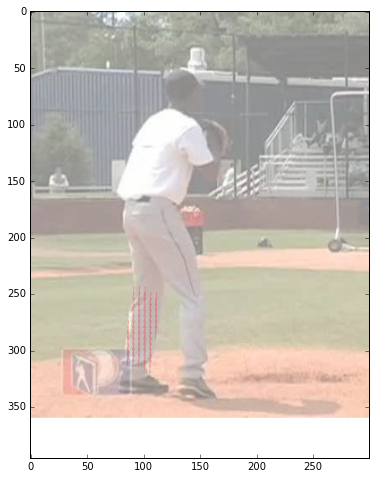

In [6]:
data=f[0].asnumpy()
from numpy import ma
U = data[16] * -1
V = data[17]
X, Y = np.meshgrid(np.arange(U.shape[1]), np.arange(U.shape[0]))
M = np.zeros(U.shape, dtype='bool')
M[U**2 + V**2 < 0.1*0.1] = True
U = ma.masked_array(U, mask=M)
V = ma.masked_array(V, mask=M)

import cv2
image=cv2.imread(r'H:\Penn_Action\frames\0001\000001.jpg')
image=image[:400,:300]
plt.figure()
plt.imshow(image[:,:,[2,1,0]], alpha = .5)

s = 5
Q = plt.quiver(X[::s,::s], Y[::s,::s], U[::s,::s]*2, V[::s,::s]*2, 
               scale=50, headaxislength=4, alpha=.5, width=0.001, color='r')

fig = plt.gcf()
fig.set_size_inches(8, 8)